## Versão 14.11.20 
---
* Corrigido bug nas condições de fluxo nos contornos direito e superior (a condição testada nunca executava)
* Retirados imports desnecessários e redundantes 
### A Fazer:
* melhor comentar o código
* plot 3D possui erros




Temperatura no lado inferior: 100
Temperatura no lado esquerdo: d
Fluxo no lado esquerdo: 0
Temperatura no lado superior: d
Fluxo no lado superior: 0
Temperatura no lado direito: d
Fluxo no lado direito: 0


---------------------------------------------------------------
         Dimensão da malha: 70 linhas/colunas
   Limite superior do erro: 0.01 %
                 Iterações: 3215
           Pontos iterados: 15528450
 Tempo de Iteração (clock): 81.438 segundos
---------------------------------------------------------------


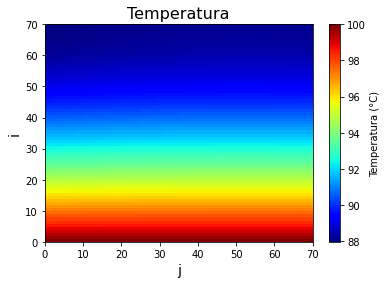

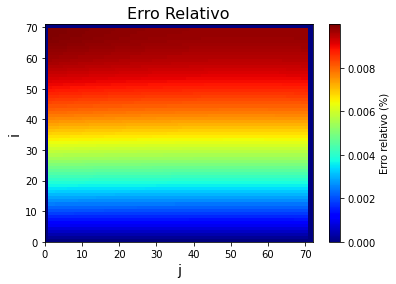

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Dimensão da placa
L = 100;
# Dimensão da malha
n = 70
# Limite Superior do Erro
Lim = .01e-2

#################   MALHA   #################
X = Y = np.linspace(0, L, n)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

fluxo = np.zeros(4)
T = np.zeros([len(Y),len(X)])


################# MATRIZ DOS ERROS #################
erro = np.zeros([len(T[0,:]),len(T[:,0])]) + 10 # matriz erro inicializada com 10 em todas as posições
erro[0,  :] = 0 # Se não forem definidos como 0, nunca será mudado e o loop (while) será infinito.
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0

#################   CONDIÇÕES DE CONTORNO   #################
L = 'd D f F'
letras = L.split()

# -------------- # Entrada do Usuário # -------------- #
T_inf =  input("Temperatura no lado inferior: ")
# Verificação de Cond. no FLuxo
if T_inf in letras:
    D_inf = float(input("Fluxo no lado inferior: "))
    T = np.insert(T, 0, - 2*dx*D_inf, axis=0)
    erro = np.insert(erro, 0, 0, axis=0)
    fluxo[0] = 1
else: 
    T[0, :] = float(T_inf)
    
    
T_esq =  input("Temperatura no lado esquerdo: ")
if T_esq in letras:
    D_esq = float(input("Fluxo no lado esquerdo: "))
    T = np.insert(T, 0, - 2*dy*D_esq, axis=1)
    erro = np.insert(erro, 0, 0, axis=1)
    fluxo[1] = 1
else: 
    T[:, 0] = float(T_esq)
    

T_sup =  input("Temperatura no lado superior: ")
if T_sup in letras:
    D_sup = float(input("Fluxo no lado superior: "))
    T = np.insert(T, len(T[:,0]), -2*dx*D_sup, axis=0)
    erro = np.insert(erro, len(erro[:,0]), 0, axis=0)
    fluxo[2] = 1
else: 
    T[-1, :] = float(T_sup)
    
    
T_dir =  input("Temperatura no lado direito: ")
if T_dir in letras:
    D_dir = float(input("Fluxo no lado direito: "))
    T = np.insert(T, len(T[0, :]), -2*dy*D_dir, axis=1)
    erro = np.insert(erro, len(erro[0, :]), 0, axis=1)
    fluxo[3] = 1
else: 
    T[:, -1] = float(T_dir)

#print(T)

#################   SOLUÇÃO   #################

# Sobrerrelaxação
lamb = 1.5

# Matriz auxiliar para T
#Taux = np.zeros([len(T[0,:]),len(T[:, 0])])
Taux = np.zeros([len(T[:,0]),len(T[0, :])])

# Auxiliares para contagem de iterações
iterac = 0
loops = 0

# Auxiliares para a contagem do tempo
t1 = time.clock()

while np.any(erro > Lim):
    for i in range(1,len(T[:,0])-1):     # Percorre as linhas internas
        for j in range(1,len(T[0,:])-1): # Percorre as colunas internas

            # -------- #  Ajuste dos pnts aux pra condições de fluxo # -------- #
            # Fluxo no Contorno Inferior
            if i == 1:
                if fluxo[0] == 1:
                    T[0,j] = T[1,j] - 2*dx*D_inf
            
            # Fluxo no Contorno Esquerdo
            if j == 1: 
                if fluxo[1] == 1:
                    T[i,0] = T[i,1] - 2*dy*D_esq

            
            # ----------------------- # Pontos Internos # ------------------------ #
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            
            #print(i,", ",j)
            # -------- #  Ajuste dos pnts aux finais pra condições de fluxo # -------- #
            # Fluxo no Contorno Superior
            if i == len(T[:,0])-2:
                #print("Ultima linha interna")
                if fluxo[2] == 1:
                    # Temp no pnt aux
                    T[i+1,j] = T[i-1,j] - 2*dx*D_sup
                    
                    # Recalculando a temp no contorno
                    Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
                    T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]

            # Fluxo no Contorno Direito
            if j == len(T[0,:])-2: 
                #print("Ultima coluna interna")
                if fluxo[3] == 1:
                    # Temp no pnt aux
                    T[i,j+1] = T[i,j-1] - 2*dy*D_dir
                    
                    # Recalculando a temp no contorno
                    Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
                    T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            erro[i,j] = abs( (T[i,j] - Taux[i,j])/T[i,j]) # Cálculo do erro relativo em cada posição
            #erro[i,j] = abs( (Tnovo - Taux[i,j])/Tnovo)
            Taux[i,j] = T[i,j]
            loops += 1
    #print(T)
    iterac += 1
    #print (erro)

t2 = time.clock()

### Recorte dos Pontos Auxiliares ##

if fluxo[0] == 1:
    T = T[1:, :]
if fluxo[1] == 1:
    T = T[:, 1:]
if fluxo[2] == 1:
    T = T[:-1, :]
if fluxo[3] == 1:
    T = T[:, :-1]

    
    
#################   PRINTS   #################
print("\n")
print("---------------------------------------------------------------")
print("         Dimensão da malha:", n, "linhas/colunas")
print("   Limite superior do erro:", np.round(Lim*100, 10), "%")
print ("                 Iterações:", iterac)
print ("           Pontos iterados:", loops)
print(" Tempo de Iteração (clock):", np.round(t2-t1,3), "segundos")
print("---------------------------------------------------------------")



#################   PLOTS   #################

###### Plot Malha

# xx, yy = np.meshgrid(X, Y, sparse=False)


# malha, ax_m = plt.subplots()
# plt.plot(xx, yy, 'b.')
# plt.title('Malha', fontsize=20)
# plt.xlabel('x', fontsize=15)
# plt.ylabel('y', fontsize=15)
# plt.show()



###### Plot 2D

fig2D, axTemp = plt.subplots() # Cria a figura com um subplot
#pcolor(T, cmap='jet')
plt.pcolormesh(T, cmap='jet') # mair rápido que pcolor()
#fig2D, (ax1,ax2) = plt.subplots(1,2) # Cria a figura com um subplot
#pcolor(T, cmap='jet')
cbar = plt.colorbar()


axTemp.set_title('Temperatura', fontsize=16)
cbar.ax.set_ylabel('Temperatura (°C)', fontsize=10)
#fig2D.colorbar(axTemp, label='Temperatura (°C)')
axTemp.set_xlabel('j', fontsize=14)
axTemp.set_ylabel('i', fontsize=14)
plt.show()



###### Plot Erro
#fig2, ax2 = plt.subplots(1,2) # Cria a figura
fig2, ax2 = plt.subplots() # Cria a figura, dois subplots, 1 linha
#pcolor(erro, cmap='jet')  
plt.pcolormesh(erro*100, cmap='jet')
cbar = plt.colorbar()


ax2.set_title('Erro Relativo', fontsize=16)
cbar.ax.set_ylabel('Erro relativo (%)', fontsize=10)
ax2.set_xlabel('j', fontsize=14)
ax2.set_ylabel('i', fontsize=14)
#savefig('E-5Erro.pdf')
plt.show()



###### Plot 3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Z = T.reshape(xx.shape)

# ax.plot_surface(xx, yy, Z, cmap='jet')
# ax.view_init(azim=-135, elev=45) # Rotação do plot
# #cbar.ax.set_ylabel('Temperatura', fontsize=12)
# ax.set_xlabel('j', fontsize=12)
# ax.set_ylabel('i', fontsize=12)
# ax.set_title('Temperatura (°C)', fontsize=14)


         Dimensão da malha: 20 linhas/colunas
   Limite superior do erro: 1.0000000000000001e-07 %
                 Iterações: 219
           Pontos iterados: 70956
 Tempo de Iteração (clock): 0.402 segundos


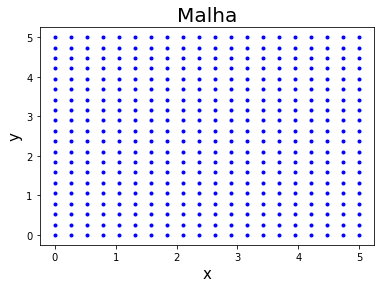

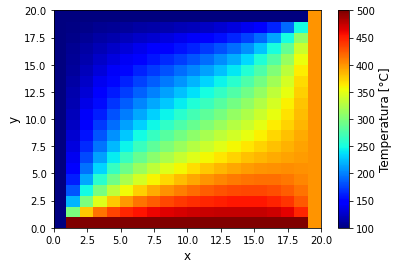

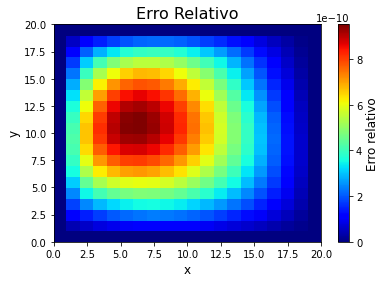

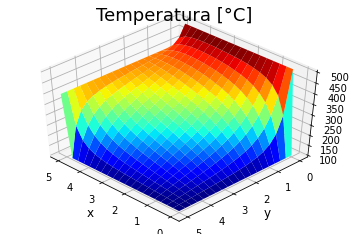

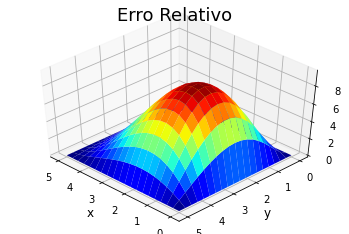

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Dimensão da Malha
n = 20

# Limite Superior do Erro
Lim = 1.0E-9

#################   MALHA   #################
X = Y = np.linspace(0, 5.0, n)
#X = np.arange(-1., 10.0, .1) 
#Y = np.arange(-1., 5.0, .1)





#################   CONDIÇÕES DE CONTORNO   #################

T = np.zeros([len(Y),len(X)])


# Entrada do usuário (opcional)
#Tinf =  float(input("Temperatura no lado esquerdo: "))
#Tsup =  float(input("Temperatura no lado direito: "))
#Tdir =  float(input("Temperatura no lado superior: "))
#Tesq =  float(input("Temperatura no lado inferior: "))


T[0,  :] = T_inf = 500#Tinf
T[-1, :] = T_sup = 100#Tsup
T[:, -1] = T_dir = 400#Tdir
T[:,  0] = T_esq = 100#Tesq

#print("T antes")
#print(T)


#################   SOLUÇÃO   #################



lamb = 1.5

# Auxiliares para o cálculo do erro relativo
erro = np.zeros([len(X),len(Y)]) + 10 # matriz erro inicializada com 10 em todas as posições
erro[0,  :] = 0 # Se não forem definidos como 0, nunca será mudado e o loop (while) será infinito.
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0

# Matriz auxiliar para T
Taux = np.zeros([len(X),len(Y)])

# Auxiliares para contagem de iterações
iterac = 0
loops = 0

# Auxiliares para a contagem do tempo
t1 = time.clock()

while np.any(erro > Lim):
    for i in range(1,len(X)-1):
        for j in range(1,len(Y)-1):
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            erro[i,j] = abs( (T[i,j] - Taux[i,j])/T[i,j]) # Cálculo do erro relativo em cada posição
            Taux[i,j] = T[i,j]
            loops += 1
    iterac += 1

t2 = time.clock()

print("         Dimensão da malha:", n, "linhas/colunas")
print("   Limite superior do erro:", Lim*100, "%")
print ("                 Iterações:", iterac)
print ("           Pontos iterados:", loops)
print(" Tempo de Iteração (clock):", np.round(t2-t1,3), "segundos")



#################   PLOTS   #################


###### Plot Malha
xx, yy = np.meshgrid(X, Y, sparse=False)


malha, ax_m = plt.subplots()
plt.plot(xx, yy, 'b.')
plt.title('Malha', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()



###### Plot 2D

#plt.figure(2)
fig2D, ax2D = plt.subplots() # Cria a figura com um subplot
pcolor(T, cmap='jet')
cbar = colorbar()

cbar.ax.set_ylabel('Temperatura [°C]', fontsize=12)
ax2D.set_xlabel('x', fontsize=12)
ax2D.set_ylabel('y', fontsize=12)
plt.show()



###### Plot Erro

fig2, ax2 = plt.subplots() # Cria a figura com um subplot
pcolor(erro, cmap='jet')  
cbar = colorbar()

ax2.set_title('Erro Relativo', fontsize=16)
cbar.ax.set_ylabel('Erro relativo', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
#savefig('E-5Erro.pdf')
plt.show()
#show()



###### Plot 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = T.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, cmap='jet')
ax.view_init(azim=135, elev=45) # Rotação do plot
#cbar.ax.set_ylabel('Temperatura', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Temperatura [°C]', fontsize=18)


### Erro
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = erro.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, cmap='jet')
ax.view_init(azim=135, elev=45) # Rotação do plot
#cbar.ax.set_ylabel('Temperatura', fontsize=12)
ax.set_title('Erro Relativo', fontsize=18)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
plt.show()



Temperatura no lado inferior: 100
Temperatura no lado esquerdo: 75
Temperatura no lado superior: d
Fluxo no lado superior: 0
Temperatura no lado direito: 50


---------------------------------------------------------------
         Dimensão da malha: 70 linhas/colunas
   Limite superior do erro: 0.1 %
                 Iterações: 413
           Pontos iterados: 1937796
 Tempo de Iteração (clock): 10.292 segundos
---------------------------------------------------------------


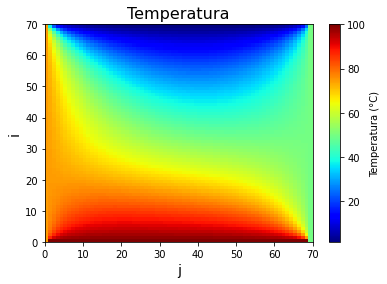

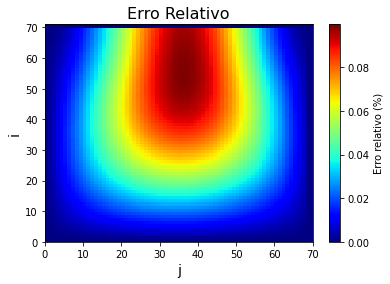

In [ ]:
#% matplotlib notebook
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Dimensão da Malha
n = 70

# Limite Superior do Erro
Lim = 1.0E-3

#################   MALHA   #################
X = Y = np.linspace(0, 100, n)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

fluxo = np.zeros(4)
T = np.zeros([len(Y),len(X)])


################# MATRIZ DOS ERROS #################
erro = np.zeros([len(T[0,:]),len(T[:,0])]) + 10 # matriz erro inicializada com 10 em todas as posições
erro[0,  :] = 0 # Se não forem definidos como 0, nunca será mudado e o loop (while) será infinito.
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0

#################   CONDIÇÕES DE CONTORNO   #################
L = 'd D f F'
letras = L.split()


# Entrada do usuário 
T_inf =  input("Temperatura no lado inferior: ")
if T_inf in letras:
    sys.stdout.flush()
    T_inf = float(input("Fluxo no lado inferior: "))
    T = np.insert(T, 0, - 2*dx*T_inf, axis=0)
    erro = np.insert(erro, 0, 0, axis=0)
    fluxo[0] = 1
else: 
    T[0, :] = float(T_inf)
    
    
T_esq =  input("Temperatura no lado esquerdo: ")
if T_esq in letras:
    T_esq = float(input("Fluxo no lado esquerdo: "))
    T = np.insert(T, 0, - 2*dy*T_esq, axis=1)
    erro = np.insert(erro, 0, 0, axis=1)
    fluxo[1] = 1
else: 
    T[:, 0] = float(T_esq)
    

T_sup =  input("Temperatura no lado superior: ")
if T_sup in letras:
    T_sup = float(input("Fluxo no lado superior: "))
    T = np.insert(T, len(T[:,0]), -2*dx*T_sup, axis=0)
    erro = np.insert(erro, len(erro[:,0]), 0, axis=0)
    fluxo[2] = 1
else: 
    T[-1, :] = float(T_sup)
    
    
T_dir =  input("Temperatura no lado direito: ")
if T_dir in letras:
    T_dir = float(input("Fluxo no lado direito: "))
    T = np.insert(T, len(T[0, :]), -2*dy*T_dir, axis=1)
    erro = np.insert(erro, len(erro[0, :]), 0, axis=1)
    fluxo[3] = 1
else: 
    T[:, -1] = float(T_dir)

#print(T)

#################   SOLUÇÃO   #################

# Sobrerrelaxação
lamb = 1.5

# Matriz auxiliar para T
#Taux = np.zeros([len(T[0,:]),len(T[:, 0])])
Taux = np.zeros([len(T[:,0]),len(T[0, :])])

# Auxiliares para contagem de iterações
iterac = 0
loops = 0

# Auxiliares para a contagem do tempo
t1 = time.clock()

while np.any(erro > Lim):
#for k in range (1000):
    for i in range(1,len(T[:,0])-1):
        for j in range(1,len(T[0,:])-1):

            
            if i == 1:
                if fluxo[0] == 1:
                    T[0,j] = T[1,j] - 2*dx*T_inf
                
            if i == len(T[:,0])-1:
                if fluxo[2] == 1:
                    T[i+1,j] = T[i-1,j] - 2*dx*T_sup
                
            if j == 1: 
                if fluxo[1] == 1:
                    T[i,0] = T[i,1] - 2*dy*T_esq

            if j == len(T[0,:])-1: 
                if fluxo[3] == 1:
                    T[i,j+1] = T[i,j-1] - 2*dy*T_dir
                    
            
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            
            
            erro[i,j] = abs( (T[i,j] - Taux[i,j])/T[i,j]) # Cálculo do erro relativo em cada posição
            #erro[i,j] = abs( (Tnovo - Taux[i,j])/Tnovo)
            Taux[i,j] = T[i,j]
            loops += 1

    iterac += 1
    #print (erro)

t2 = time.clock()

### RECORTE DAS DERIVADAS ##

if fluxo[0] == 1:
    T = T[1:, :]
if fluxo[1] == 1:
    T = T[:, 1:]
if fluxo[2] == 1:
    T = T[:-1, :]
if fluxo[3] == 1:
    T = T[:, :-1]

    
    
#################   PRINTS   #################

print("\n")
print("---------------------------------------------------------------")
print("         Dimensão da malha:", n, "linhas/colunas")
print("   Limite superior do erro:", np.round(Lim*100, 10), "%")
print ("                 Iterações:", iterac)
print ("           Pontos iterados:", loops)
print(" Tempo de Iteração (clock):", np.round(t2-t1,3), "segundos")
print("---------------------------------------------------------------")



#################   PLOTS   #################

###### Plot Malha

# xx, yy = np.meshgrid(X, Y, sparse=False)


# malha, ax_m = plt.subplots()
# plt.plot(xx, yy, 'b.')
# plt.title('Malha', fontsize=20)
# plt.xlabel('x', fontsize=15)
# plt.ylabel('y', fontsize=15)
# plt.show()



###### Plot 2D

fig2D, axTemp = plt.subplots() # Cria a figura com um subplot
#pcolor(T, cmap='jet')
pcolormesh(T, cmap='jet') # mair rápido que pcolor()
#fig2D, (ax1,ax2) = plt.subplots(1,2) # Cria a figura com um subplot
#pcolor(T, cmap='jet')
cbar = colorbar()


axTemp.set_title('Temperatura', fontsize=16)
cbar.ax.set_ylabel('Temperatura (°C)', fontsize=10)
#fig2D.colorbar(axTemp, label='Temperatura (°C)')
axTemp.set_xlabel('j', fontsize=14)
axTemp.set_ylabel('i', fontsize=14)
plt.show()



###### Plot Erro
#fig2, ax2 = plt.subplots(1,2) # Cria a figura
fig2, ax2 = plt.subplots() # Cria a figura, dois subplots, 1 linha
#pcolor(erro, cmap='jet')  
pcolormesh(erro*100, cmap='jet')  
cbar = colorbar()


ax2.set_title('Erro Relativo', fontsize=16)
cbar.ax.set_ylabel('Erro relativo (%)', fontsize=10)
ax2.set_xlabel('j', fontsize=14)
ax2.set_ylabel('i', fontsize=14)
#savefig('E-5Erro.pdf')
plt.show()



###### Plot 3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Z = T.reshape(xx.shape)

# ax.plot_surface(xx, yy, Z, cmap='jet')
# ax.view_init(azim=-135, elev=45) # Rotação do plot
# #cbar.ax.set_ylabel('Temperatura', fontsize=12)
# ax.set_xlabel('j', fontsize=12)
# ax.set_ylabel('i', fontsize=12)
# ax.set_title('Temperatura (°C)', fontsize=14)


Temperatura no lado inferior: d
Fluxo no lado inferior: 0
Temperatura no lado esquerdo: 100
Temperatura no lado superior: 75
Temperatura no lado direito: 50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:128: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in greater




---------------------------------------------------------------
         Dimensão da malha: 70 linhas/colunas
   Limite superior do erro: 0.1 %
                 Iterações: 703
           Pontos iterados: 3298476
 Tempo de Iteração (clock): 17.646 segundos
---------------------------------------------------------------


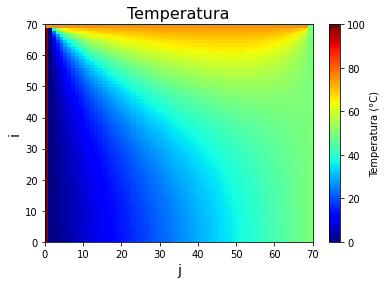

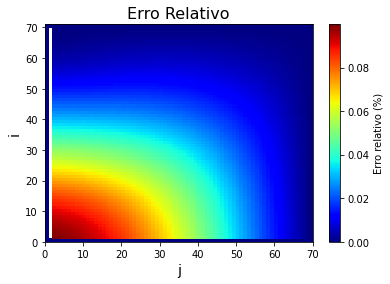

In [ ]:
#% matplotlib notebook
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Dimensão da Malha
n = 70

# Limite Superior do Erro
Lim = 1.0E-3

#################   MALHA   #################
X = Y = np.linspace(0, 100, n)

dx = X[1] - X[0]
dy = Y[1] - Y[0]

fluxo = np.zeros(4)
T = np.zeros([len(Y),len(X)])


################# MATRIZ DOS ERROS #################
erro = np.zeros([len(T[0,:]),len(T[:,0])]) + 10 # matriz erro inicializada com 10 em todas as posições
erro[0,  :] = 0 # Se não forem definidos como 0, nunca será mudado e o loop (while) será infinito.
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0

#################   CONDIÇÕES DE CONTORNO   #################
L = 'd D f F'
letras = L.split()


# Entrada do usuário 
T_inf =  input("Temperatura no lado inferior: ")
if T_inf in letras:
    sys.stdout.flush()
    T_inf = float(input("Fluxo no lado inferior: "))
    T = np.insert(T, 0, - 2*dx*T_inf, axis=0)
    erro = np.insert(erro, 0, 0, axis=0)
    fluxo[0] = 1
else: 
    T[0, :] = float(T_inf)
    
    
T_esq =  input("Temperatura no lado esquerdo: ")
if T_esq in letras:
    T_esq = float(input("Fluxo no lado esquerdo: "))
    T = np.insert(T, 0, - 2*dy*T_esq, axis=1)
    erro = np.insert(erro, 0, 0, axis=1)
    fluxo[1] = 1
else: 
    T[:, 0] = float(T_esq)
    

T_sup =  input("Temperatura no lado superior: ")
if T_sup in letras:
    T_sup = float(input("Fluxo no lado superior: "))
    T = np.insert(T, len(T[:,0]), -2*dx*T_sup, axis=0)
    erro = np.insert(erro, len(erro[:,0]), 0, axis=0)
    fluxo[2] = 1
else: 
    T[-1, :] = float(T_sup)
    
    
T_dir =  input("Temperatura no lado direito: ")
if T_dir in letras:
    T_dir = float(input("Fluxo no lado direito: "))
    T = np.insert(T, len(T[0, :]), -2*dy*T_dir, axis=1)
    erro = np.insert(erro, len(erro[0, :]), 0, axis=1)
    fluxo[3] = 1
else: 
    T[:, -1] = float(T_dir)

#print(T)

#################   SOLUÇÃO   #################

# Sobrerrelaxação
lamb = 1.5

# Matriz auxiliar para T
#Taux = np.zeros([len(T[0,:]),len(T[:, 0])])
Taux = np.zeros([len(T[:,0]),len(T[0, :])])

# Auxiliares para contagem de iterações
iterac = 0
loops = 0

# Auxiliares para a contagem do tempo
t1 = time.clock()

while np.any(erro > Lim):
    for i in range(1,len(T[:,0])-1):     # Percorre as linhas internas
        for j in range(1,len(T[0,:])-1): # Percorre as colunas internas

            # -------- #  Ajuste dos contornos iniciais pra condições de fluxo # -------- #
            # Fluxo no Contorno Inferior
            if i == 1:
                if fluxo[0] == 1:
                    T[0,j] = T[1,j] - 2*dx*T_inf         
            
            # Fluxo no Contorno Esquerdo
            if j == 1: 
                if fluxo[1] == 1:
                    T[i,0] = T[i,1] - 2*dy*T_esq     


            # ----------------------- # Pontos Internos # ------------------------ #
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            
            # -------- #  Ajuste dos contornos finais pra condições de fluxo # -------- #
            # Fluxo no Contorno Superior
            if i == len(T[:,0])-1:
                if fluxo[2] == 1:
                    T[i+1,j] = T[i-1,j] - 2*dx*T_sup

            # Fluxo no Contorno Direito
            if j == len(T[0,:])-1: 
                if fluxo[3] == 1:
                    T[i,j+1] = T[i,j-1] - 2*dy*T_dir

            
            erro[i,j] = abs( (T[i,j] - Taux[i,j])/T[i,j]) # Cálculo do erro relativo em cada posição
            #erro[i,j] = abs( (Tnovo - Taux[i,j])/Tnovo)
            Taux[i,j] = T[i,j]
            loops += 1

    iterac += 1
    #print (erro)

t2 = time.clock()

### RECORTE DAS DERIVADAS ##

if fluxo[0] == 1:
    T = T[1:, :]
if fluxo[1] == 1:
    T = T[:, 1:]
if fluxo[2] == 1:
    T = T[:-1, :]
if fluxo[3] == 1:
    T = T[:, :-1]

    
    
#################   PRINTS   #################

print("\n")
print("---------------------------------------------------------------")
print("         Dimensão da malha:", n, "linhas/colunas")
print("   Limite superior do erro:", np.round(Lim*100, 10), "%")
print ("                 Iterações:", iterac)
print ("           Pontos iterados:", loops)
print(" Tempo de Iteração (clock):", np.round(t2-t1,3), "segundos")
print("---------------------------------------------------------------")



#################   PLOTS   #################

###### Plot Malha

# xx, yy = np.meshgrid(X, Y, sparse=False)


# malha, ax_m = plt.subplots()
# plt.plot(xx, yy, 'b.')
# plt.title('Malha', fontsize=20)
# plt.xlabel('x', fontsize=15)
# plt.ylabel('y', fontsize=15)
# plt.show()



###### Plot 2D

fig2D, axTemp = plt.subplots() # Cria a figura com um subplot
#pcolor(T, cmap='jet')
pcolormesh(T, cmap='jet') # mair rápido que pcolor()
#fig2D, (ax1,ax2) = plt.subplots(1,2) # Cria a figura com um subplot
#pcolor(T, cmap='jet')
cbar = colorbar()


axTemp.set_title('Temperatura', fontsize=16)
cbar.ax.set_ylabel('Temperatura (°C)', fontsize=10)
#fig2D.colorbar(axTemp, label='Temperatura (°C)')
axTemp.set_xlabel('j', fontsize=14)
axTemp.set_ylabel('i', fontsize=14)
plt.show()



###### Plot Erro
#fig2, ax2 = plt.subplots(1,2) # Cria a figura
fig2, ax2 = plt.subplots() # Cria a figura, dois subplots, 1 linha
#pcolor(erro, cmap='jet')  
pcolormesh(erro*100, cmap='jet')  
cbar = colorbar()


ax2.set_title('Erro Relativo', fontsize=16)
cbar.ax.set_ylabel('Erro relativo (%)', fontsize=10)
ax2.set_xlabel('j', fontsize=14)
ax2.set_ylabel('i', fontsize=14)
#savefig('E-5Erro.pdf')
plt.show()



###### Plot 3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# Z = T.reshape(xx.shape)

# ax.plot_surface(xx, yy, Z, cmap='jet')
# ax.view_init(azim=-135, elev=45) # Rotação do plot
# #cbar.ax.set_ylabel('Temperatura', fontsize=12)
# ax.set_xlabel('j', fontsize=12)
# ax.set_ylabel('i', fontsize=12)
# ax.set_title('Temperatura (°C)', fontsize=14)
